<a href="https://colab.research.google.com/github/alupo933/Clustering-Work-for-Machine-Learning/blob/main/Feature_Engineering_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering Exercise (Core)
In this exercise you will be working with data about bike share rentals.  You can download the data here. (https://docs.google.com/spreadsheets/d/e/2PACX-1vROUXPkYUkX-2W7JbJ0-oNKaXzpg4NtmU9IeWEY6yFKm32ZEJOpRh_soHD4BeIcuHjYik3SEoXmkgwj/pub?output=csv)

Your task is to engineer some new features to try to improve a mode's ability to predict the total number of bike share rentals during a given hour of the day.

1. Import the data the drop the 'casual' and 'registered' columns.  These are redundant with your target, 'count'.  



2. Transform the 'datetime' column into a datetime type and use it to create 3 new columns in the data frame containing the:

  1. Name of the Month
  2. Name of the Day of the Week
  3. Hour of the Day

   Make sure all 3 new columns are 'object' datatype so they can be one-hot encoded later.  

   Drop the 'datetime' and 'season' columns.  These are now redundant.



3. The temperatures in the 'temp' and 'atemp' column are in Celsius.  Use `.apply()` to convert them to Fahrenheit.



4. Create a new column, 'temp_variance' that is the difference between 'temp' and 'atemp'.  Drop the 'atemp' column.



#Optional: 
Use a predictive model of your choice and try to predict the 'count' of hourly bikeshare users with both the original features and the engineered feature set you just created.  

**Remember to drop the 'casual' and 'registered' columns from both versions before modeling.**

Did these feature engineering choices improve your ability to predict the 'count'?



1. Import the data the drop the 'casual' and 'registered' columns.  These are redundant with your target, 'count'.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

In [3]:
# Import df
bike_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vROUXPkYUkX-2W7JbJ0-oNKaXzpg4NtmU9IeWEY6yFKm32ZEJOpRh_soHD4BeIcuHjYik3SEoXmkgwj/pub?output=csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# drop the 'casual' and 'registered' colummna
bike_df.drop(columns = ['casual', 'registered'], axis=1, inplace = True)

In [5]:
# Check to see that it performed right
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,1


2. Transform the 'datetime' column into a datetime type and use it to create 3 new columns in the data frame containing the:

  1. Name of the Month
  2. Name of the Day of the Week
  3. Hour of the Day

   Make sure all 3 new columns are 'object' datatype so they can be one-hot encoded later.  

   Drop the 'datetime' and 'season' columns.  These are now redundant.

In [6]:
# Transform the 'datetime' column into a datetime type 
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [7]:
# Create a new column in the data frame containing the Name of the month
bike_df['Month'] = bike_df['datetime'].dt.month_name()
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,January


In [8]:
# Create a new column in the data fram containing the Name of the day of the week
bike_df['Day'] = bike_df['datetime'].dt.day_name()
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,January,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,January,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,January,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,January,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,January,Saturday


In [9]:
# Create a new column in the data frame containing the hour of the day
bike_df['Hour'] = bike_df['datetime'].dt.hour
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,Day,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,January,Saturday,4


In [10]:
# Check to see that all of the three new columns are objects
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  Month       10886 non-null  object        
 11  Day         10886 non-null  object        
 12  Hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 1.1+ MB


In [11]:
# convert hour column to object
bike_df['Hour'] = bike_df['Hour'].astype(str)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  Month       10886 non-null  object        
 11  Day         10886 non-null  object        
 12  Hour        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.1+ MB


In [12]:
# drop the columns 'datetime' and 'season'
bike_df.drop(columns = ['datetime', 'season'], axis = 1, inplace = True)
bike_df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,Day,Hour
0,0,0,1,9.84,14.395,81,0.0,16,January,Saturday,0
1,0,0,1,9.02,13.635,80,0.0,40,January,Saturday,1
2,0,0,1,9.02,13.635,80,0.0,32,January,Saturday,2
3,0,0,1,9.84,14.395,75,0.0,13,January,Saturday,3
4,0,0,1,9.84,14.395,75,0.0,1,January,Saturday,4


3. The temperatures in the 'temp' and 'atemp' column are in Celsius.  Use `.apply()` to convert them to Fahrenheit.

In [13]:
# convert 'temp' column from celcius to Farenheight
bike_df['temp'] = bike_df['temp'].apply(lambda x: 1.8 * x + 32)
bike_df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,Day,Hour
0,0,0,1,49.712,14.395,81,0.0,16,January,Saturday,0
1,0,0,1,48.236,13.635,80,0.0,40,January,Saturday,1
2,0,0,1,48.236,13.635,80,0.0,32,January,Saturday,2
3,0,0,1,49.712,14.395,75,0.0,13,January,Saturday,3
4,0,0,1,49.712,14.395,75,0.0,1,January,Saturday,4


In [14]:
# convert 'atemp' column from Celcius to Farenheight
bike_df['atemp'] = bike_df['atemp'].apply(lambda x: 1.8 * x + 32)
bike_df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,Day,Hour
0,0,0,1,49.712,57.911,81,0.0,16,January,Saturday,0
1,0,0,1,48.236,56.543,80,0.0,40,January,Saturday,1
2,0,0,1,48.236,56.543,80,0.0,32,January,Saturday,2
3,0,0,1,49.712,57.911,75,0.0,13,January,Saturday,3
4,0,0,1,49.712,57.911,75,0.0,1,January,Saturday,4


4. Create a new column, 'temp_variance' that is the difference between 'temp' and 'atemp'.  Drop the 'atemp' column.

In [15]:
bike_df['temp_variance'] = bike_df['temp'] - bike_df['atemp']
bike_df = bike_df.drop('atemp', axis = 1)
bike_df.head()

,holiday,workingday,weather,temp,humidity,windspeed,count,Month,Day,Hour,temp_variance
0,0,0,1,49.712,81,0.0,16,January,Saturday,0,-8.199
1,0,0,1,48.236,80,0.0,40,January,Saturday,1,-8.307
2,0,0,1,48.236,80,0.0,32,January,Saturday,2,-8.307
3,0,0,1,49.712,75,0.0,13,January,Saturday,3,-8.199
4,0,0,1,49.712,75,0.0,1,January,Saturday,4,-8.199


Use a predictive model of your choice and try to predict the 'count' of hourly bikeshare users with both the original features and the engineered feature set you just created.  

Remember to drop the 'casual' and 'registered' columns from both versions before modeling.

Did these feature engineering choices improve your ability to predict the 'count'?

In [16]:
bike_df_original = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vROUXPkYUkX-2W7JbJ0-oNKaXzpg4NtmU9IeWEY6yFKm32ZEJOpRh_soHD4BeIcuHjYik3SEoXmkgwj/pub?output=csv')
bike_df_original.drop(columns = ['casual', 'registered'], axis=1, inplace = True)
bike_df_original.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,1


just a quick overview to see if the data is cleaned before we start any type of modeling

In [17]:
bike_df_original.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [18]:
bike_df_original.duplicated().sum()

0

In [19]:
bike_df_original.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [20]:
bike_df_original['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [21]:
bike_df_original.loc[bike_df_original['weather'] == 4, :]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,164


In [22]:
bike_df.loc[bike_df['weather'] == 4, :]

,holiday,workingday,weather,temp,humidity,windspeed,count,Month,Day,Hour,temp_variance
5631,0,1,4,46.76,86,6.0032,164,January,Monday,18,-5.697


The above outlier of 4 in weather  is shown. I can't state weather it should be there or not. So I am just going to drop it in both df and go ahead with my predictive modeling

In [23]:
bike_df = bike_df.drop(index = 5631)
bike_df_original = bike_df_original.drop(index = 5631)

Let's check to see if the column was dropped. The dataframes had 10886 rows before, they should now have 10885

In [24]:
len(bike_df)

10885

In [25]:
len(bike_df_original)

10885

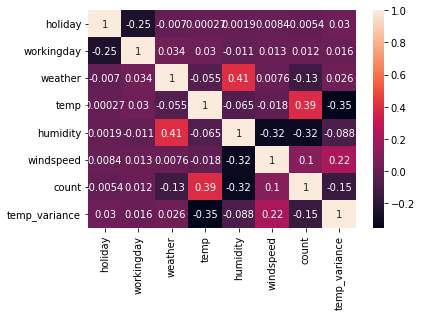

In [26]:
# Next we'll make a heatmap to explore any relationships within the data.
corr = bike_df.corr()
sns.heatmap(corr, annot = True);

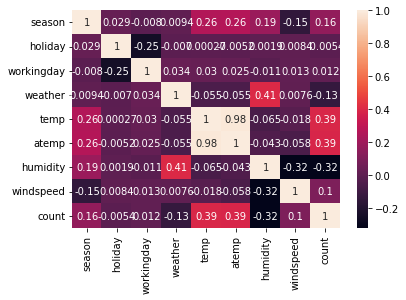

In [27]:
# Next we'll make a heatmap of the original data.
corr = bike_df_original.corr()
sns.heatmap(corr, annot = True);

In [28]:
# Let's split the datasets into features and identify the target

In [29]:
X = bike_df.drop(columns = 'count')
y = bike_df['count']

X_1 = bike_df_original.drop(columns = 'count')
y_1 = bike_df_original['count']

In [30]:
# Perform and Train Test Split (We'll go through the df we created first)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [31]:
from pandas.core.arrays.sparse import dtype
# As stated earlier, we will use a OHE to input the data in the missing categorical column (BP) and we will use 
# a simpleImputer to imput the median data in for Age column

# First we'll make column selectors
number_selector = make_column_selector(dtype_include=['number'])
category_selector = make_column_selector(dtype_include=['object'])

# Next we'll Instantiate our Scaler and One Hot Encoder
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

# Now we need to make our imputers
median_imputer = SimpleImputer(strategy = 'median')
frequent_imputer = SimpleImputer(strategy='most_frequent')

In [32]:
# Now we need to make our pipelines
number_pipe = make_pipeline(median_imputer, scaler)
category_pipe = make_pipeline(frequent_imputer, ohe)

In [33]:
# Create Tuples to put into the column transformer from the pipeline
number_tuple = (number_pipe, number_selector)
category_tuple = (category_pipe, category_selector)

In [39]:
# Next we'll create the preprocessing column transformer with the tuples
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173c850>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173ca10>)])

# KNN Classifier Model

We are going to use a KNeighbors Classifier Model to predict the count column

In [40]:
# Instantiate the Model
knn = KNeighborsRegressor()

# Make an XGB Classifier Pipeline
knn_pipe = make_pipeline(preprocessor, knn)

# Fit the pipeline
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173c850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173ca10>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [41]:
# Evaluate the accuracy
print('---'*15)
print('    KNN of Modified DataFrame')
print('---'*15)
print('Training Accuracy', knn_pipe.score(X_train, y_train))
print('Testing Accuracy', knn_pipe.score(X_test, y_test))

---------------------------------------------
    KNN of Modified DataFrame
---------------------------------------------
Training Accuracy 0.7365901952194901
Testing Accuracy 0.6048337378679062


The Accuracy of this model is ok, the model is a little overfit let's see the comparison of this same knn model on the original data fram

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state = 42)

In [43]:
# Instantiate the Model
knn2 = KNeighborsRegressor()

# Make an XGB Classifier Pipeline
knn2_pipe = make_pipeline(preprocessor, knn2)

# Fit the pipeline
knn2_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173c850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa23173ca10>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [45]:
print('---'*15)
print('    KNN of Original DataFRame')
print('---'*15)
print('Training Accuracy', knn2_pipe.score(X_train, y_train))
print('Testing Accuracy', knn2_pipe.score(X_test, y_test))

---------------------------------------------
    KNN of Original DataFRame
---------------------------------------------
Training Accuracy 0.5286958672389332
Testing Accuracy 0.30969860994754816


Results:
---------------------------------------------
    KNN of Original DataFRame
---------------------------------------------
- Training Accuracy 0.5286958672389332
- Testing Accuracy 0.30969860994754816

---------------------------------------------
    KNN of Modified DataFrame
---------------------------------------------
- Training Accuracy 0.7365901952194901
- Testing Accuracy 0.6048337378679062

Without hypertuning any parameters we can see that this knn Model was actually improved by adding featuring engineering. The changing of the datetime column to months, days and hours almost doubled our testing accuracy.